# Linear regression
### Treating the learning task as a regression problem, develop a linear regression object that predicts the number of persons that used a bicycle from all the available numeric features. Perform the experiment 3 times, each time with a different learning rate a, and plot the loss with respect to the training epochs required for the model to converge.

In [164]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:
df = pd.read_csv('./day.csv', sep=",", quoting=3)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


The Gradient descent algorithms are affected by the feature scaling. We can succeed faster computation of the theta parameter if the features are scaled.

In [166]:
df = df.astype(str)
df['cnt'] = pd.to_numeric(df['cnt'])

y = df['cnt']
X = df.drop(columns=['dteday', 'instant','cnt'])

Split the dataset into training data and test data. The learning model learns on the training set. We test the predictivity of the model on the test dataset.

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform feauture scaling
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Tune the learning rate parameter following the trial and error methodology. Perform three experiments, one for each of the three [0.01,0.001,0.0001] possible values of the learning rate.

Learn the Stochastic Gradient Descent(SGD) model three times, using the different alpha. Describe the process by plotting the loss after each experiment.

In [168]:
alphas=[0.01,0.001,0.0001]
epochs = 32
epochLoss = []
epoch_index=0
minimum_val_error = float("inf")
best_learn_rate = None
for alpha_i in alphas:
    for epoch in np.arange(0, epochs):
        regressor = SGDRegressor (
            alpha=0.0001,
            loss ="squared_loss",
            max_iter=epochs,
            learning_rate="invscaling",
            eta0=alpha_i,
            verbose=1)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        loss=r2_score(y_test, y_pred)  
        epochLoss.append(loss)
        if loss < minimum_val_error:
            minimum_val_error = loss
            best_learn_rate = alpha_i
    epoch_index = epoch_index + 1

-- Epoch 1
Norm: 1119.91, NNZs: 13, Bias: 3586.770481, T: 584, Avg. loss: 2694325.412243
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1187.91, NNZs: 13, Bias: 4191.148233, T: 1168, Avg. loss: 230760.892632
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1233.42, NNZs: 13, Bias: 4375.814317, T: 1752, Avg. loss: 66732.495288
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1268.20, NNZs: 13, Bias: 4447.736782, T: 2336, Avg. loss: 38237.073008
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1301.49, NNZs: 13, Bias: 4474.472996, T: 2920, Avg. loss: 27895.697754
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1336.29, NNZs: 13, Bias: 4485.272255, T: 3504, Avg. loss: 22063.116511
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1362.67, NNZs: 13, Bias: 4490.199456, T: 4088, Avg. loss: 17852.311856
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1387.04, NNZs: 13, Bias: 4492.491713, T: 4672, Avg. loss: 14741.439078
Total training time: 0.00 seconds.
-- Epoch 9
Nor

/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/l

Norm: 1593.85, NNZs: 13, Bias: 4495.178548, T: 15768, Avg. loss: 1134.516856
Total training time: 0.01 seconds.
-- Epoch 28
Norm: 1598.05, NNZs: 13, Bias: 4495.206903, T: 16352, Avg. loss: 1019.258710
Total training time: 0.01 seconds.
-- Epoch 29
Norm: 1602.34, NNZs: 13, Bias: 4495.060074, T: 16936, Avg. loss: 918.594796
Total training time: 0.01 seconds.
-- Epoch 30
Norm: 1606.13, NNZs: 13, Bias: 4495.245795, T: 17520, Avg. loss: 828.031062
Total training time: 0.01 seconds.
-- Epoch 31
Norm: 1609.61, NNZs: 13, Bias: 4495.321304, T: 18104, Avg. loss: 747.090486
Total training time: 0.01 seconds.
-- Epoch 32
Norm: 1612.97, NNZs: 13, Bias: 4495.350338, T: 18688, Avg. loss: 674.889108
Total training time: 0.01 seconds.
-- Epoch 1
Norm: 1099.14, NNZs: 13, Bias: 3595.132992, T: 584, Avg. loss: 2704608.207248
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1180.45, NNZs: 13, Bias: 4193.611666, T: 1168, Avg. loss: 227159.636964
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1232.86

/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/l

-- Epoch 8
Norm: 952.80, NNZs: 13, Bias: 2383.179294, T: 4672, Avg. loss: 2540808.835664
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 976.86, NNZs: 13, Bias: 2525.293437, T: 5256, Avg. loss: 2210856.954432
Total training time: 0.00 seconds.
-- Epoch 10
Norm: 997.35, NNZs: 13, Bias: 2654.292025, T: 5840, Avg. loss: 1933314.493057
Total training time: 0.00 seconds.
-- Epoch 11
Norm: 1014.78, NNZs: 13, Bias: 2771.958664, T: 6424, Avg. loss: 1697967.387697
Total training time: 0.00 seconds.
-- Epoch 12
Norm: 1029.23, NNZs: 13, Bias: 2879.699040, T: 7008, Avg. loss: 1497063.321278
Total training time: 0.01 seconds.
-- Epoch 13
Norm: 1041.97, NNZs: 13, Bias: 2978.674072, T: 7592, Avg. loss: 1324613.778895
Total training time: 0.01 seconds.
-- Epoch 14
Norm: 1053.26, NNZs: 13, Bias: 3069.888739, T: 8176, Avg. loss: 1175755.636201
Total training time: 0.01 seconds.
-- Epoch 15
Norm: 1063.62, NNZs: 13, Bias: 3154.130142, T: 8760, Avg. loss: 1046708.810774
Total training time: 0.01 second

/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/l

Norm: 455.42, NNZs: 13, Bias: 769.172815, T: 15768, Avg. loss: 7662170.888369
Total training time: 0.01 seconds.
-- Epoch 28
Norm: 464.57, NNZs: 13, Bias: 788.454282, T: 16352, Avg. loss: 7573231.776068
Total training time: 0.01 seconds.
-- Epoch 29
Norm: 473.49, NNZs: 13, Bias: 807.467056, T: 16936, Avg. loss: 7486348.345736
Total training time: 0.01 seconds.
-- Epoch 30
Norm: 482.20, NNZs: 13, Bias: 826.218828, T: 17520, Avg. loss: 7401426.745359
Total training time: 0.01 seconds.
-- Epoch 31
Norm: 490.70, NNZs: 13, Bias: 844.720931, T: 18104, Avg. loss: 7318386.528538
Total training time: 0.01 seconds.
-- Epoch 32
Norm: 499.01, NNZs: 13, Bias: 862.981455, T: 18688, Avg. loss: 7237145.103800
Total training time: 0.01 seconds.
-- Epoch 1
Norm: 46.18, NNZs: 13, Bias: 69.412361, T: 584, Avg. loss: 11661416.553027
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 78.82, NNZs: 13, Bias: 117.012834, T: 1168, Avg. loss: 11302971.673196
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1

/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/maria/.local/l

Plot the loss for alpha =  0.01


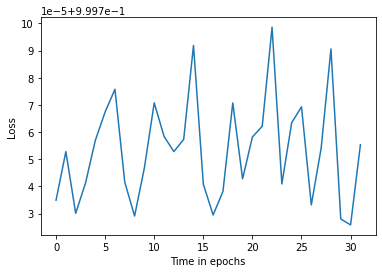

Plot the loss for alpha =  0.001


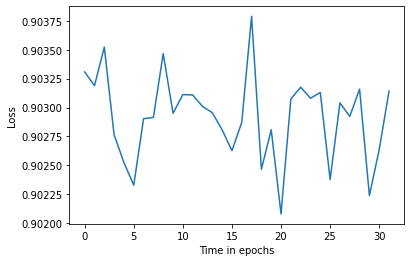

Plot the loss for alpha =  0.0001


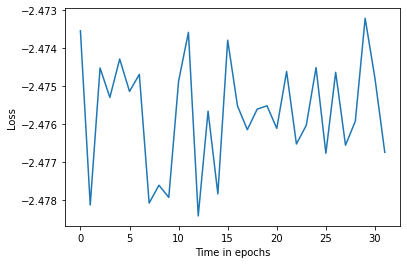

In [169]:
def plotLoss(loss, alpha):
    print("Plot the loss for alpha = ", alpha)
    plt.figure()
    plt.plot(np.arange(len(loss)), loss)
    plt.xlabel("Time in epochs")
    plt.ylabel("Loss")
    plt.show()
    
epoch_index = 0
for alpha_i in alphas:    
    plotLoss(epochLoss[epoch_index * epochs:(epoch_index+1) * epochs], alpha_i)
    epoch_index = epoch_index + 1

### Which value of a has been more suitable and why? For the most prominent feature, and by using only a single instance from the training set, plot the loss with respect to (y − ŷ)

The most suitable alpha had value equal to 0.0001. A small value of the learn rate helps the model to converge faster to the (global) optimal, but takes longer for the algorithm to train.

In [170]:
print("The most suitable alpha was ", best_learn_rate)

The most suitable alpha was  0.0001


From a previous question, we have found that the most prominent feature is the registered feature. 
Use sklearn.linear_model.SGDRegressor() with max_iter=1, and its partial_fit() method, to simulate a single step of gradient descent.

The loss is bigger when we use the partial_fit on one feature of the dataset. 

In [171]:
df = pd.read_csv('./day.csv', sep=",", quoting=3)
df = df.astype(str)


y = pd.to_numeric(df['cnt'])
X = df['registered'].values
X = X.reshape(-1,1)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

-- Epoch 1
Norm: 1442.99, NNZs: 1, Bias: 3575.361697, T: 584, Avg. loss: 2991765.803240
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1460.54, NNZs: 1, Bias: 3570.667647, T: 584, Avg. loss: 2945043.861920
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1434.08, NNZs: 1, Bias: 3558.815522, T: 584, Avg. loss: 3045279.950924
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1477.87, NNZs: 1, Bias: 3585.680626, T: 584, Avg. loss: 2931281.698105
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1439.84, NNZs: 1, Bias: 3576.446280, T: 584, Avg. loss: 2994051.074822
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1440.06, NNZs: 1, Bias: 3569.590690, T: 584, Avg. loss: 2998345.040263
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1425.53, NNZs: 1, Bias: 3565.524924, T: 584, Avg. loss: 3046143.864090
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1428.90, NNZs: 1, Bias: 3576.312221, T: 584, Avg. loss: 3037287.866593
Total training time: 0.00 seconds.
-- Epoch 1
Norm:

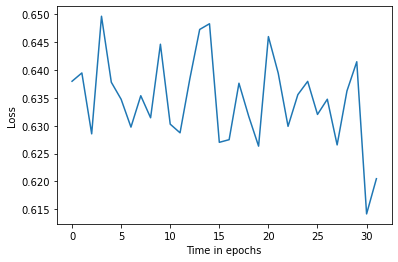

In [172]:
lr=0.0001
epochs = 32
epochLoss = []
for epoch in np.arange(0, epochs):
    regressor = SGDRegressor (
            alpha=lr,
            loss ="squared_loss",
            max_iter=epochs,
            learning_rate="invscaling",
            verbose=1)
    # With the partial_fit method, we perform one epoch of stochastic gradient descent on one sample of the feature
    regressor.partial_fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    loss=r2_score(y_test, y_pred)  
    epochLoss.append(loss)

Plot the loss for alpha =  0.0001


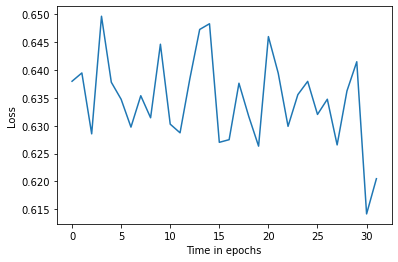

In [173]:
plotLoss(epochLoss, lr)